# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('bright')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 20)

# Check Data Quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= age =================


31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


============= job =================


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


============= marital =================


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


============= education =================


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


============= default =================


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


============= housing =================


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


============= loan =================


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


============= contact =================


cellular     26144
telephone    15044
Name: contact, dtype: int64


============= month =================


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


============= day_of_week =================


thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


============= campaign =================


1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


============= pdays =================


999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


============= previous =================


0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


============= poutcome =================


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


============= emp.var.rate =================


 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


============= cons.price.idx =================


93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64


============= cons.conf.idx =================


-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64


============= euribor3m =================


4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64


============= nr.employed =================


5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


============= y =================


no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
# Cek Duplicatre
df.duplicated().sum()

1784

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(39404, 20)

# Missing Value

In [ ]:
df.isna().sum().sort_values(ascending=False)

age               0
job               0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [ ]:
df_plot = df.select_dtypes(include=['float','int'])

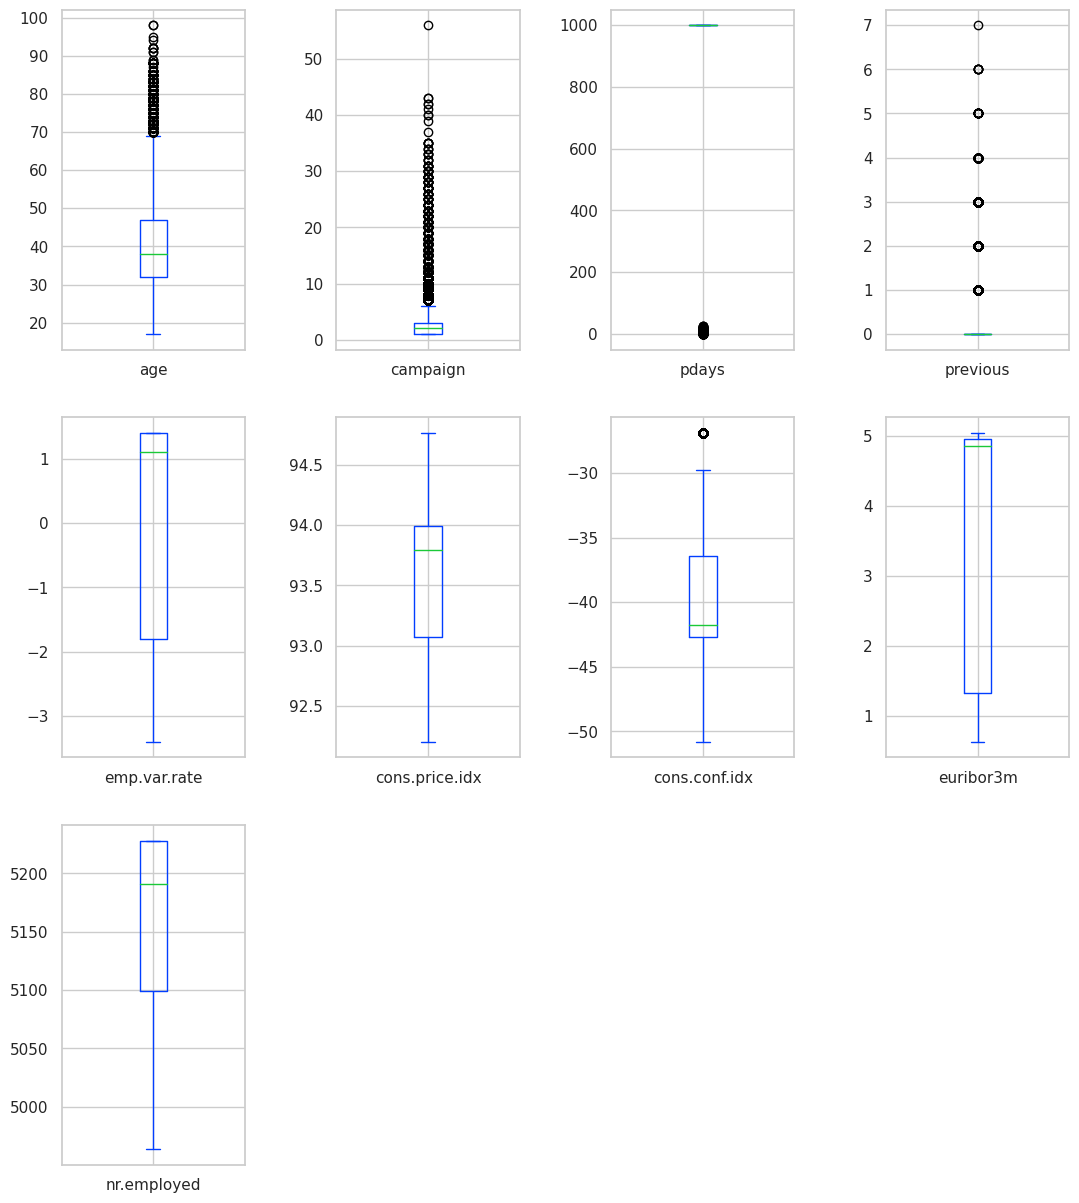

In [ ]:
df_plot.plot(subplots=True, layout=(3,4), kind='box', figsize=(13,15))
plt.subplots_adjust(wspace=0.5)

In [ ]:
df = df[df['age'] > 17].reset_index(drop=True)

In [ ]:
df['pdays'] = df['pdays'].replace(999,-1)

In [ ]:
y ={'yes':1, 'no':0}
df['y'] = df['y'].map(y)

In [ ]:
numeric = df_plot.columns

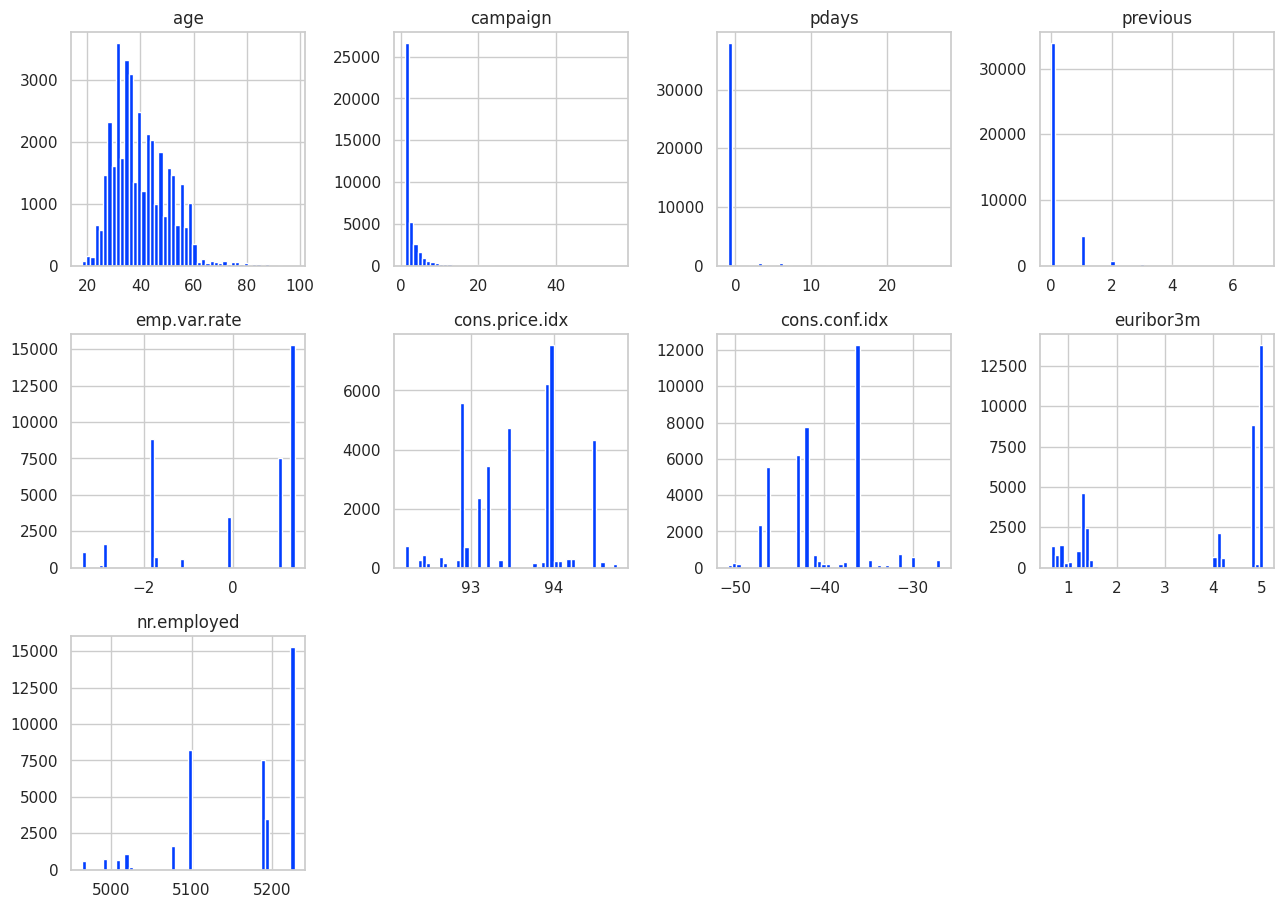

In [ ]:
fig = plt.figure(figsize=(13,15))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(5,4), column=numeric)
plt.tight_layout()
plt.show()

## Data Insight

#### Customer Age

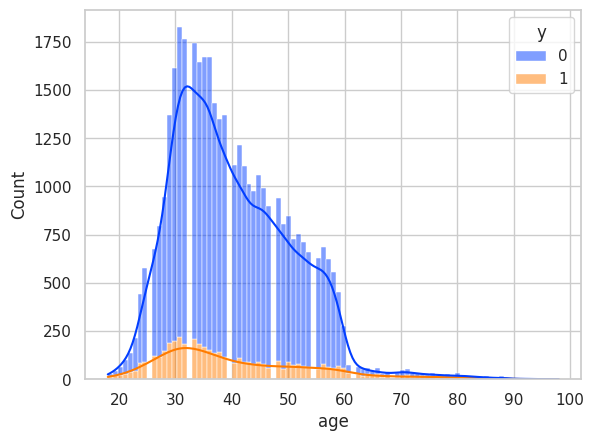

In [ ]:
sns.histplot(data=df, x='age', hue='y', multiple='stack', kde=True)
plt.show()

# dari histogram yang dibawah ini dapat dilihat sekitar umur 30 cenderung menyetujui.

#### Jobs

In [ ]:
def barPerc(df, xVar, ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x == x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        hueBars = bars[ind::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center", va="bottom")

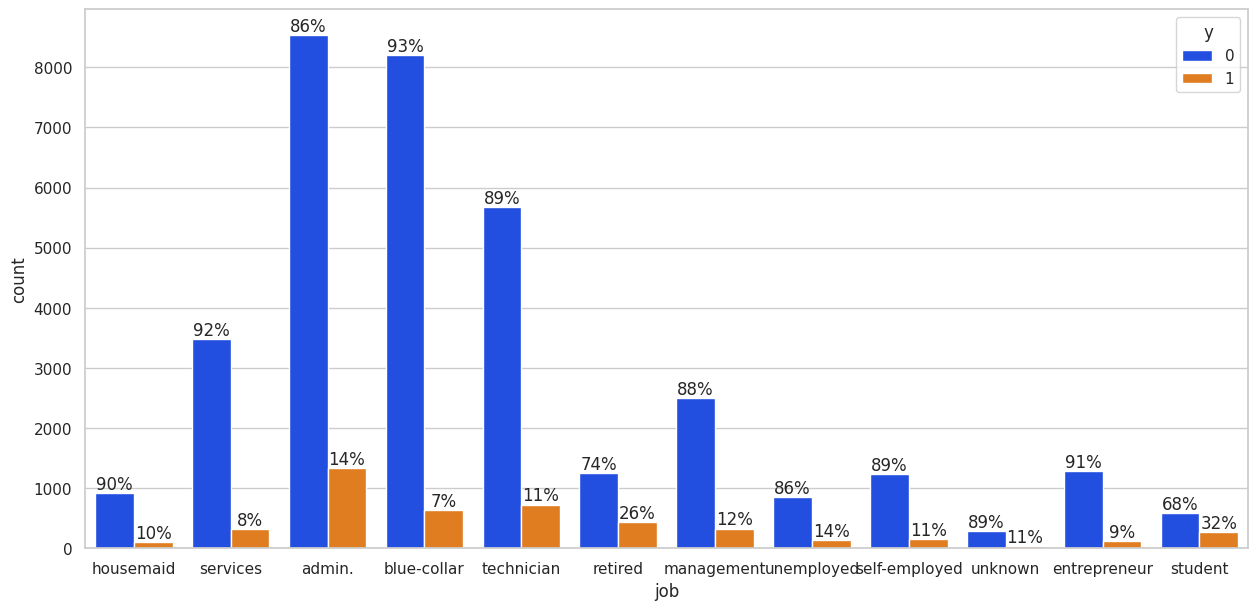

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x='job', hue='y', data=df)
barPerc(df, 'job', ax)

# dari barchart dibawah ini dapat diketahui student cederung untuk menerima campaign dan  dikuti retired.

#### Marital Status

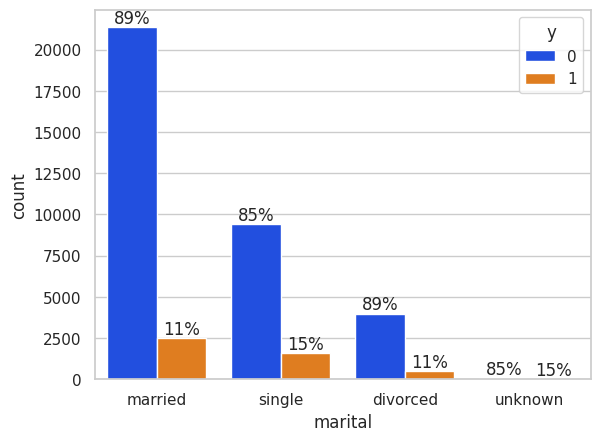

In [ ]:
ax = sns.countplot(x='marital', hue='y', data=df)
barPerc(df, 'marital', ax)

# dari barchard dibawah ini diketahui bahwa single dan unknown cenderung menerima campaign.

#### Education

In [ ]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

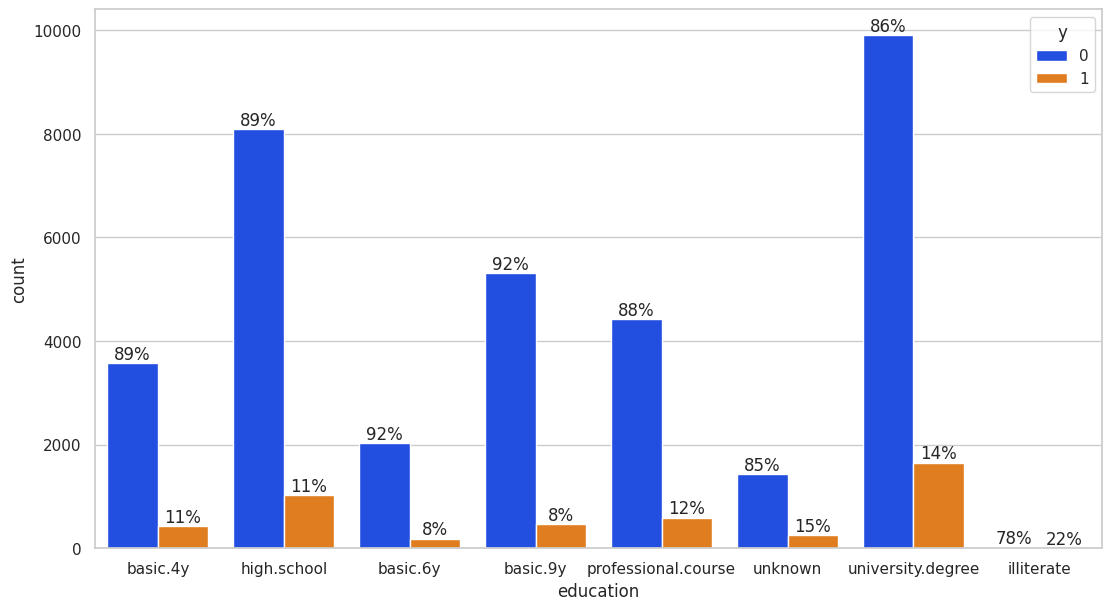

In [ ]:
plt.figure(figsize=(13,7))
ax = sns.countplot(x='education', hue='y', data=df)
barPerc(df, 'education', ax)

# Illiterate cenderung untuk menrima campaign. unknow dan university.degree juga cederung untuk menerima campaign.

#### Default

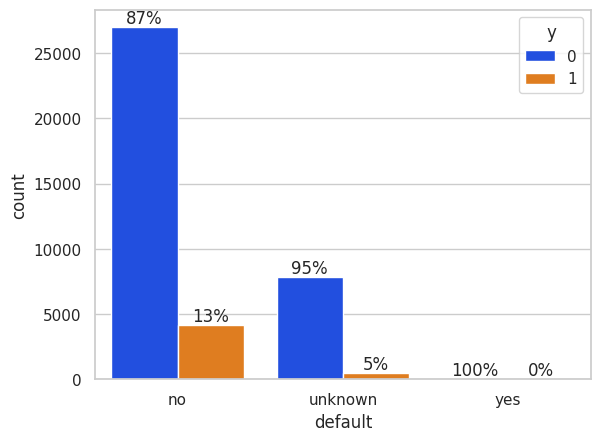

In [ ]:
ax = sns.countplot(x='default', hue='y', data=df)
barPerc(df, 'default', ax)

# dari barchart dibawah ini diketahui yang mempunyai credit gagal bayar 100% menolak campaign.
# klien yang mempunyai credit gagal bayarsangat sedikit data-nya, kemungkina pihak Bank hanya menargetkan klien yang tidak punya riwayat credit gagal bayar.

#### Housing

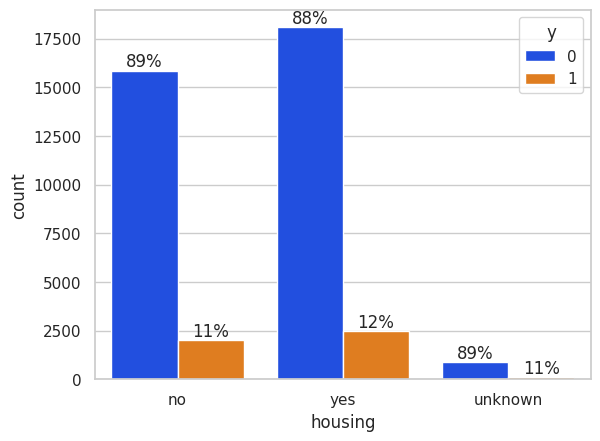

In [ ]:
ax = sns.countplot(x='housing', hue='y', data=df)
barPerc(df, 'housing', ax)

# berdasarkan barchart dibawah ini diketahui klien yang mempunyai cicilan rumah cederung menerima capaign.

#### Loan

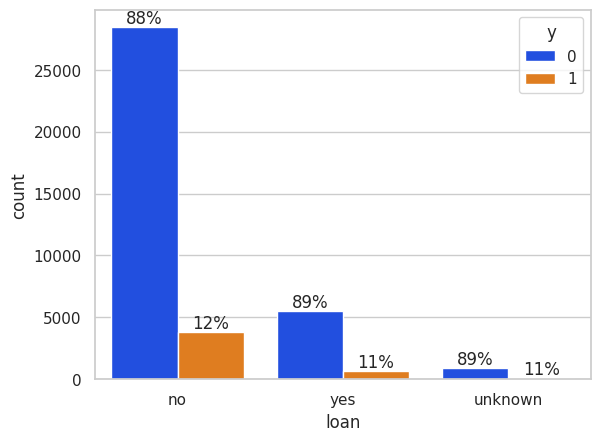

In [ ]:
ax = sns.countplot(x='loan', hue='y', data=df)
barPerc(df, 'loan', ax)

# Bedasarkan barchart dibawah ini diketahui klien yang tidak mempunyai pinjaman cederung menerima capign.

#### Contact

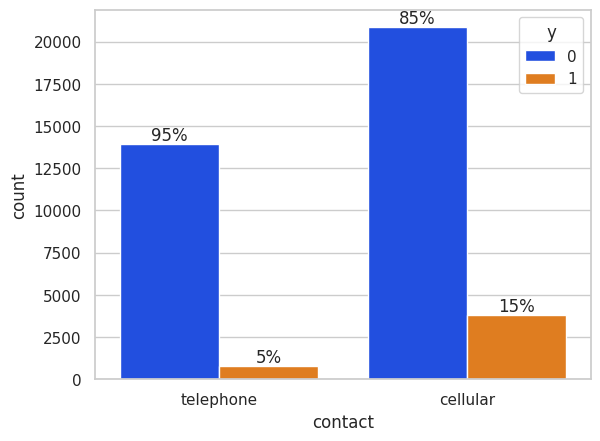

In [ ]:
ax = sns.countplot(x='contact', hue='y', data=df)
barPerc(df, 'contact', ax)

# Berdasarkan barchart dibawah ini diketahui klien yang dihubungi melalui cellular cenderung untuk menerima campaign

#### Month

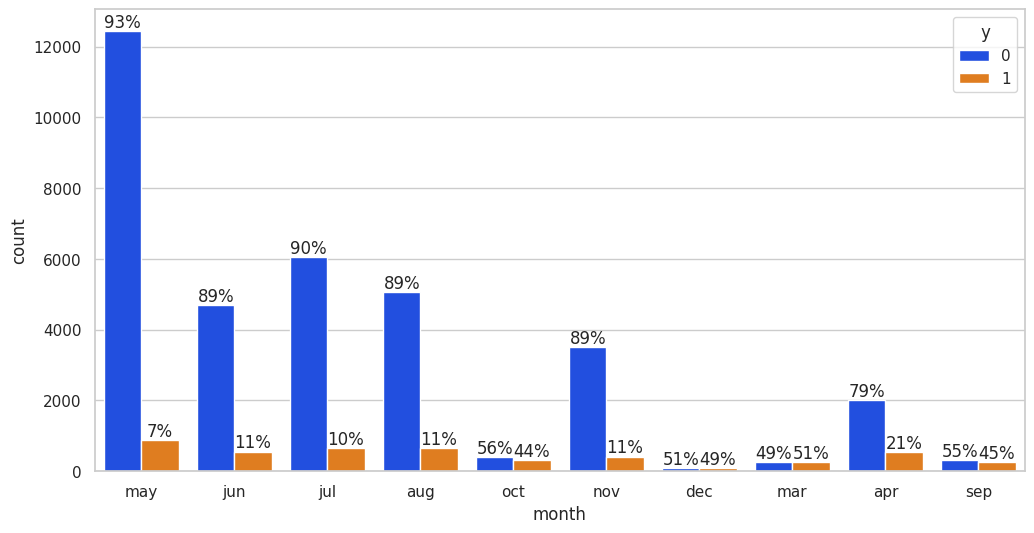

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='month', hue='y', data=df)
barPerc(df, 'month', ax)

# Berdasarkan barchart dibawah ini diketahui klien yang terakhir dihubunggi pada maret, september,otober, dan desember cenderung menerima campign

#### day_of_weeK

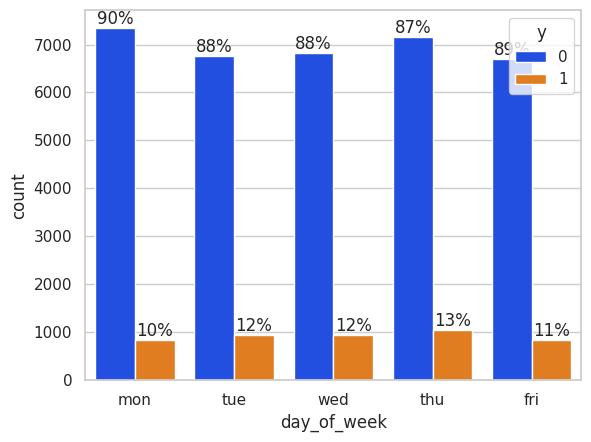

In [ ]:
ax = sns.countplot(x='day_of_week', hue='y', data =df)
barPerc(df, 'day_of_week', ax)

# berdasarkan barchart dibawah ini diketahui klien yang dihubungi terakhir pasa hari kamis sedikit lebih cenderung menerima campaign

#### Campaign

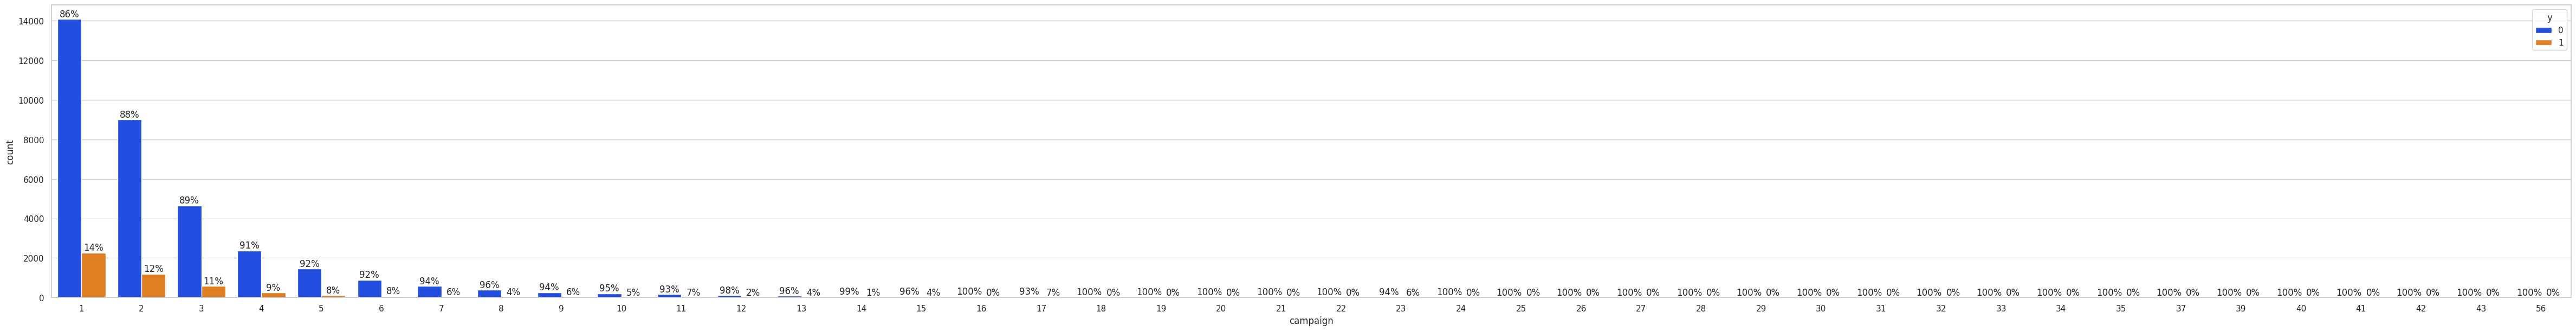

In [ ]:
plt.figure(figsize=(60,7))
ax = sns.countplot(x='campaign', hue='y', data =df)
barPerc(df, 'campaign', ax)


# berdasrkan barchart dibawah ini diketahui klien yang dihubungi 1 kali selama campaign berjalan cederung menerima campaign.

In [ ]:
df[['campaign', 'y']].corr()[['y']]

# hubungan antara respon(y) dengan jumlah klien dihubungi selama campaign berkorelasi negatif walaupun sangat lemah

,y
campaign,-0.072329
y,1.000000


#### pdays

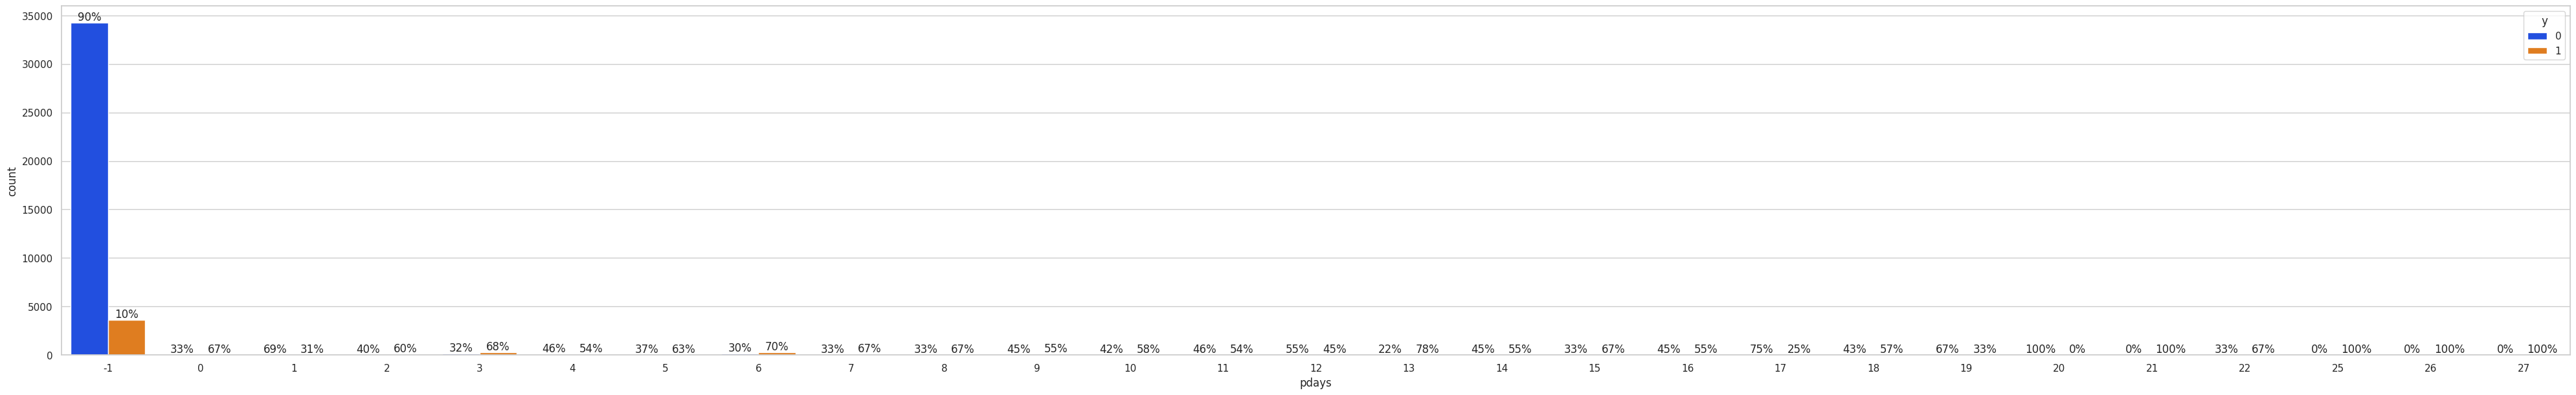

In [ ]:
plt.figure(figsize=(50,7))
ax = sns.countplot(x='pdays', hue='y', data =df)
barPerc(df, 'pdays', ax)

In [ ]:
df[['pdays', 'y']].corr()[['y']]

# hubungan anyara respon(y) dengan pdays bercorelasi positif walau lemah.

,y
pdays,0.279047
y,1.000000


#### previous

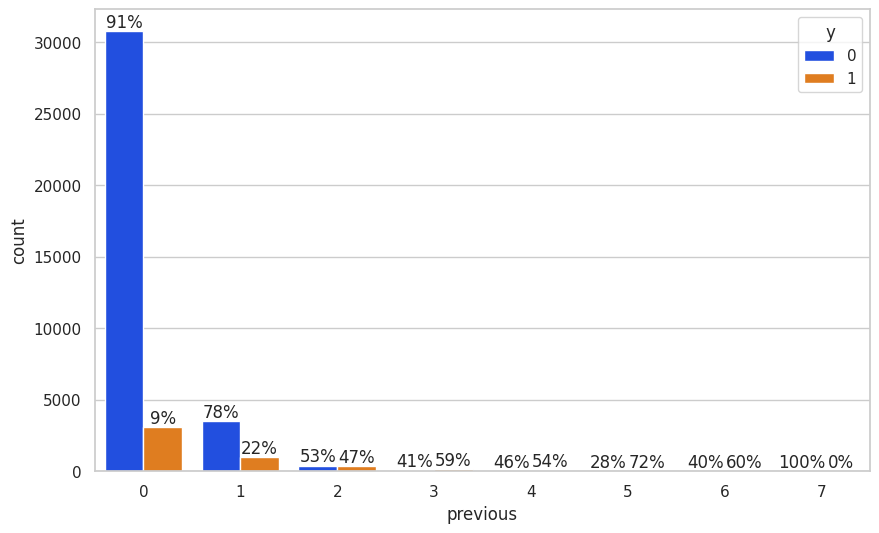

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='previous', hue='y', data =df)
barPerc(df, 'previous', ax)

In [ ]:
df[['previous', 'y']].corr()[['y']]

# hubungan antara previous dengan respon(y) berkorelasi positif lemah

,y
previous,0.229645
y,1.000000


#### poutcome

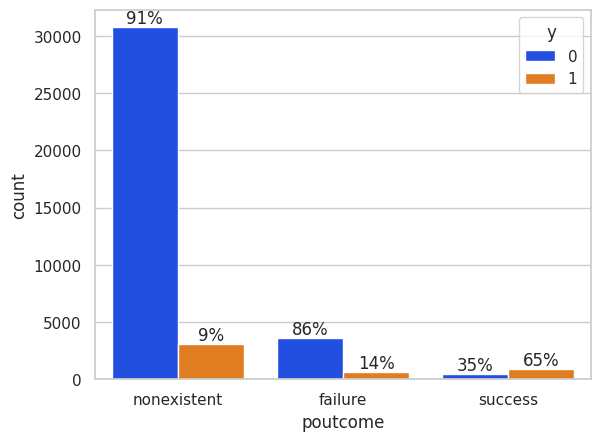

In [ ]:
ax = sns.countplot(x='poutcome', hue='y', data =df)
barPerc(df, 'poutcome', ax)

# berdasarkan barchart dibawah ini klien yang menerima campaign sebelumnya cederung menerima campaign saat ini.

#### emp.var.rate

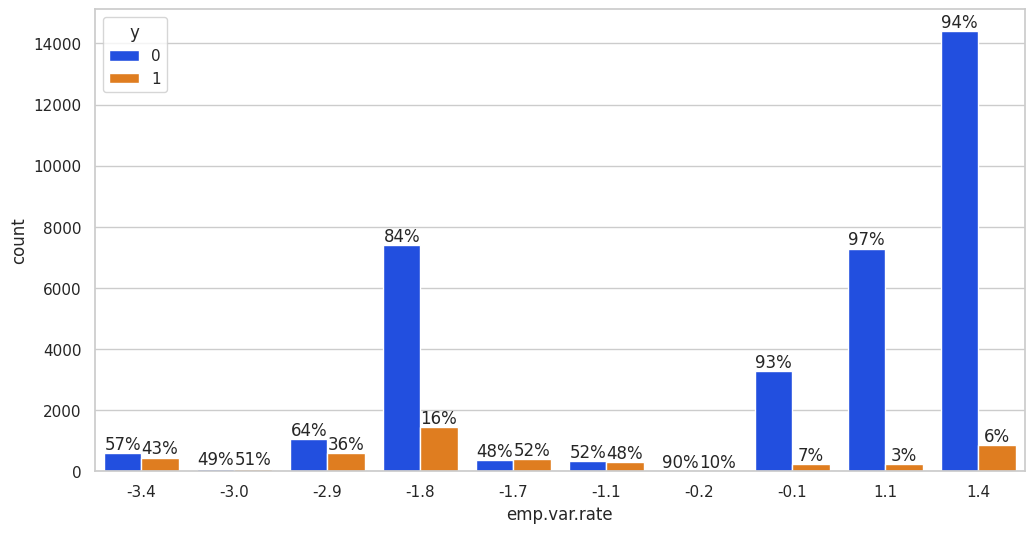

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='emp.var.rate', hue='y', data =df)
barPerc(df, 'emp.var.rate', ax)

In [ ]:
df[['emp.var.rate', 'y']].corr()[['y']]

# Hubungan antara emp.var.rate dengan respon(y) bercorelasi negatif lemah

,y
emp.var.rate,-0.297953
y,1.000000


#### cons.price.idx

In [ ]:
df[['cons.price.idx', 'y']].corr()[['y']]

# Hubungan antara cons.price.idx dengan respon(y) bercorelasi negatif lemah

,y
cons.price.idx,-0.136951
y,1.000000


#### cons.conf.idx

In [ ]:
df[['cons.conf.idx', 'y']].corr()[['y']]

# hubungan antara cons.conf.idx dengan respon(y) berkorelasi positif sangat lemah

,y
cons.conf.idx,0.056887
y,1.000000


#### euribor3m

In [ ]:
df[['euribor3m', 'y']].corr()[['y']]

# hubungan antara euribor3m dengan respon(y) berkorelasi negatif lemah

,y
euribor3m,-0.307789
y,1.000000


#### nr.employed

In [ ]:
df[['nr.employed', 'y']].corr()[['y']]

# hubungan antara nr.employed dengan respon(y) berkorelasi negatif lemah

,y
nr.employed,-0.354067
y,1.000000


## Data Spliting

In [2]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [5]:
df_train.shape, df_valid.shape, df_test.shape

((24712, 20), (8238, 20), (8238, 20))

## Preprocessing

In [6]:
df_train = df_train.drop_duplicates()
df_valid = df_valid.drop_duplicates()
df_test = df_test.drop_duplicates()

In [7]:
df_train = df_train[df_train['age'] > 17].reset_index(drop=True)
df_valid = df_valid[df_valid['age'] > 17].reset_index(drop=True)
df_test = df_test[df_test['age'] > 17].reset_index(drop=True)

In [8]:
df_train['pdays'] = df_train['pdays'].replace(999,-1)
df_valid['pdays'] = df_valid['pdays'].replace(999,-1)
df_test['pdays'] = df_test['pdays'].replace(999,-1)

## Encoding

##### Dictionary Encoding

In [9]:
y ={'yes':1, 'no':0}
df_train['y'] = df_train['y'].map(y)
df_valid['y'] = df_valid['y'].map(y)
df_test['y'] = df_test['y'].map(y)

In [10]:
education = {'illiterate':1,'basic.4y':2,'basic.6y':3, 'basic.9y':4, 'high.school':5, 'professional.course':6, 'university.degree':7, 'unknown':6 }
df_train['education'] = df_train['education'].map(education)
df_valid['education'] = df_valid['education'].map(education)
df_test['education'] = df_test['education'].map(education)

In [11]:
contact ={'telephone':1, 'cellular':0}
df_train['contact'] = df_train['contact'].map(contact)
df_valid['contact'] = df_valid['contact'].map(contact)
df_test['contact'] = df_test['contact'].map(contact)

In [12]:
month = {'mar':3,'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11,'dec':12}
df_train['month'] = df_train['month'].map(month)
df_valid['month'] = df_valid['month'].map(month)
df_test['month'] = df_test['month'].map(month)

In [13]:
day = {'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6}
df_train['day_of_week'] = df_train['day_of_week'].map(day)
df_valid['day_of_week'] = df_valid['day_of_week'].map(day)
df_test['day_of_week'] = df_test['day_of_week'].map(day)

In [14]:
default = {'yes':1, 'no':0, 'unknown':-1}
df_train['default'] = df_train['default'].map(default)
df_valid['default'] = df_valid['default'].map(default)
df_test['default'] = df_test['default'].map(default)

##### One Hot Encoding

In [15]:
#OHE
col_ohe = ['marital','housing', 'loan', 'poutcome' ]
#import pandas as pd
df_train = pd.get_dummies(df_train, columns = col_ohe)
df_valid = pd.get_dummies(df_valid, columns = col_ohe)
df_test = pd.get_dummies(df_test, columns = col_ohe)

##### Frequency Encoding

In [16]:
## Job
freq_j_train = df_train['job'].value_counts().reset_index()
freq_j_valid = df_valid['job'].value_counts().reset_index()
freq_j_test = df_test['job'].value_counts().reset_index()

In [17]:
freq_j_train.rename(columns={"index": "job", "job": "freq_j"}, inplace = True)
freq_j_valid.rename(columns={"index": "job", "job": "freq_j"}, inplace = True)
freq_j_test.rename(columns={"index": "job", "job": "freq_j"}, inplace = True)

In [18]:
freq_j_train['percent_job'] = round((freq_j_train['freq_j']/freq_j_train['freq_j'].sum())*100,2)
freq_j_valid['percent_job'] = round((freq_j_valid['freq_j']/freq_j_valid['freq_j'].sum())*100,2)
freq_j_test['percent_job'] = round((freq_j_test['freq_j']/freq_j_test['freq_j'].sum())*100,2)

In [19]:
df_train = df_train.merge(freq_j_train[['job','percent_job']], on='job', how='inner')
df_valid = df_valid.merge(freq_j_valid[['job','percent_job']], on='job', how='inner')
df_test = df_test.merge(freq_j_test[['job','percent_job']], on='job', how='inner')

In [20]:
#drop
df_train = df_train.drop('job', axis=1)
df_valid = df_valid.drop('job', axis=1)
df_test = df_test.drop('job', axis=1)

## Modeling

In [21]:
y_train = df_train['y']
y_valid = df_valid['y']
y_test = df_test['y']

In [22]:
x_train = df_train.drop(['y'], axis = 1)
x_valid = df_valid.drop(['y'], axis = 1)
x_test = df_test.drop(['y'], axis = 1)

#### Logistic Regression

In [23]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_valid_pred = lr_model.predict_proba(x_valid)[:,1]

In [25]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.748


#### RandomForest

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_valid_pred = rf_model.predict_proba(x_valid)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(y_valid, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.765


## Performance Stability Check

In [28]:
X_full_train = pd.concat([x_train, x_valid])
y_full_train = pd.concat([y_train, y_valid])

In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train, y_full_train)

RandomForestClassifier(random_state=42)

In [30]:
y_test_pred = model.predict_proba(x_test)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(y_test, y_test_pred).round(3))

RandomForest ROCAUC Result: 0.774


## Interpretation

In [32]:
import shap

In [33]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

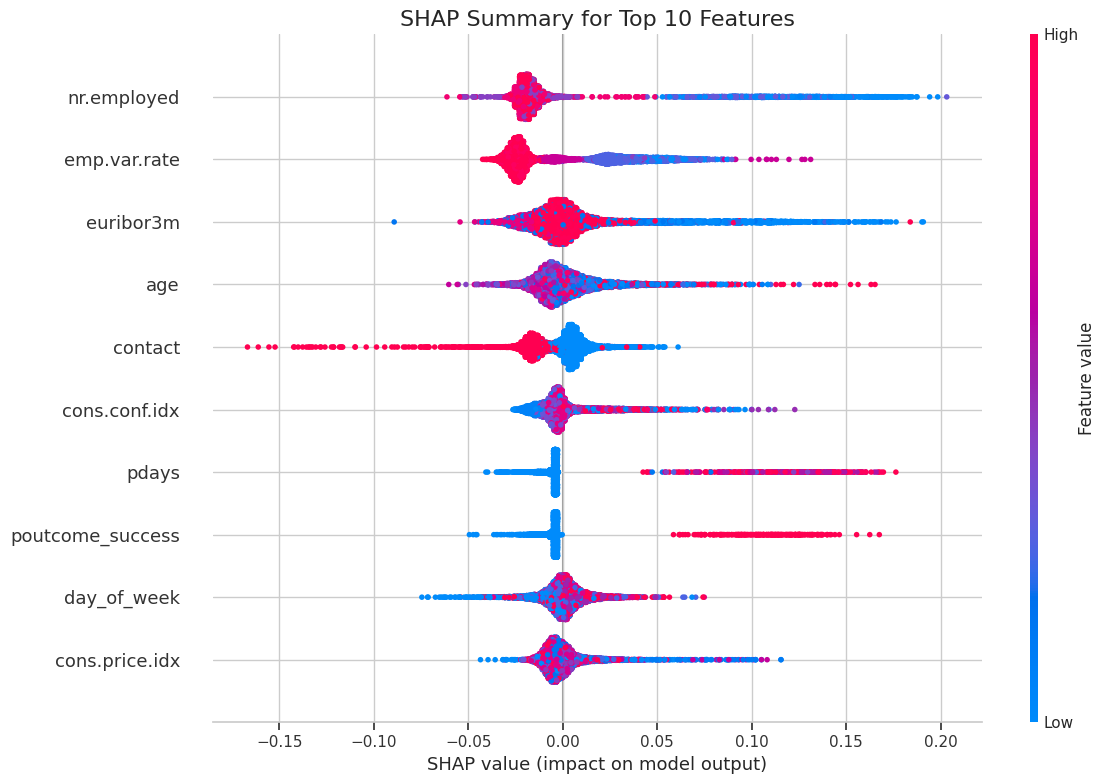

In [35]:
# plot
plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(shap_values[1], x_test, max_display=10, plot_size=[12,8])